In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import folium
from math import radians, cos, sin, asin, sqrt

In [16]:
old_data = pd.read_csv('merged_data.csv', index_col=0)

In [17]:
old_data.head()

,GEO_ID,STATE_x,COUNTY_x,POPUNI,PRED0_E,PRED0_M,PRED0_PE,PRED0_PM,PRED12_E,PRED12_M,...,WNTW_ALRB,WNTW_ALRP,WNTW_ALRA,WNTW_ALR_NPCTL,WNTW_RISKV,WNTW_RISKS,FIPS,fips_code,lng,lat
0,0500000US01001,1,1,58914,21939,5332.9,37.24,9.05,24867,5490.6,...,2.687716e-07,7.410082e-09,8.725777e-06,10.461158,8494.906508,12.217626,1001,1001.0,-86.642900,32.535142
1,0500000US01003,1,3,237874,81276,19891.0,34.17,8.36,101767,20773.6,...,1.268231e-09,2.287120e-08,1.548360e-07,13.339523,65619.701638,52.083996,1003,1003.0,-87.722745,30.727825
2,0500000US01003,1,3,237874,81276,19891.0,34.17,8.36,101767,20773.6,...,2.348603e-06,1.984562e-08,1.215728e-06,34.230888,43005.629382,42.220808,1003,1003.0,-87.722745,30.727825
3,0500000US01005,1,5,22301,5294,1837.6,23.74,8.24,9536,2133.5,...,5.788050e-07,2.347236e-08,7.606598e-07,16.125039,15501.730335,19.535476,1005,1005.0,-85.391068,31.870090
4,0500000US01005,1,5,22301,5294,1837.6,23.74,8.24,9536,2133.5,...,3.208152e-06,1.569960e-08,8.353735e-08,41.813680,15100.138053,19.153675,1005,1005.0,-85.391068,31.870090


In [18]:
old_data.drop_duplicates(subset='FIPS', inplace=True)


In [19]:
additionalData = pd.read_csv('SVI_2020_US_county.csv')

In [20]:
data = pd.merge(old_data, additionalData, on='FIPS', how='inner')


In [21]:
data.head()

,GEO_ID,STATE_x,COUNTY_x,POPUNI,PRED0_E,PRED0_M,PRED0_PE,PRED0_PM,PRED12_E,PRED12_M,...,EP_ASIAN,MP_ASIAN,EP_AIAN,MP_AIAN,EP_NHPI,MP_NHPI,EP_TWOMORE,MP_TWOMORE,EP_OTHERRACE,MP_OTHERRACE
0,0500000US01001,1,1,58914,21939,5332.9,37.24,9.05,24867,5490.6,...,1.2,0.3,0.3,0.2,0.0,0.1,2.0,0.7,0.2,0.3
1,0500000US01003,1,3,237874,81276,19891.0,34.17,8.36,101767,20773.6,...,0.9,0.2,0.6,0.2,0.0,0.1,1.9,0.4,0.3,0.2
2,0500000US01005,1,5,22301,5294,1837.6,23.74,8.24,9536,2133.5,...,0.5,0.1,0.3,0.3,0.0,0.1,1.3,0.6,0.6,0.4
3,0500000US01007,1,7,20533,6532,1833.6,31.81,8.93,7912,1979.1,...,0.3,0.4,0.1,0.1,0.0,0.2,0.4,0.3,0.0,0.2
4,0500000US01009,1,9,58917,16899,4630.9,28.68,7.86,27353,4960.7,...,0.4,0.1,0.1,0.1,0.1,0.1,1.8,0.3,0.3,0.4


In [22]:
# new_data = pd.read_csv('us_county_latlng.csv')
# new_data.head()

In [23]:

# new_data = pd.read_csv('us_county_latlng.csv')
# data['FIPS'] = data['FIPS'].astype(str)
# new_data['fips_code'] = new_data['fips_code'].astype(str)
# merged_data = pd.merge(data, new_data[['fips_code', 'lng', 'lat']], left_on='FIPS', right_on='fips_code', how='left')

In [24]:
# merged_data.to_csv('merged_data.csv')

In [25]:
# Example: Clustering based on custom variables
# Assuming 'data' is your DataFrame

def cluster_custom_variables(data, custom_variables, n_clusters=5, n_components=2):
    """
    Perform clustering based on custom variables.

    Parameters:
    - data (DataFrame): The DataFrame containing the data.
    - custom_variables (list): The list of custom variables to be used for clustering.
    - n_clusters (int): The number of clusters for KMeans.
    - n_components (int): The number of components for PCA.

    Returns:
    - fig (plotly.graph_objects.Figure): The Plotly figure of the clusters.
    - plot_df (DataFrame): The DataFrame containing the clustered data.

    Example usage:
    fig, plot_df = cluster_custom_variables(data, ['Variable1', 'Variable2', 'Variable3'], n_clusters=5, n_components=2)
    """

    # Include county names in the data used for clustering
    county_names = data['County_names']

    # Extract the custom variables from the data
    custom_data = data[custom_variables]

    # Handle missing values (e.g., using mean imputation)
    imputer = SimpleImputer(strategy='mean')
    custom_data_imputed = imputer.fit_transform(custom_data)

    # Normalize the features
    scaler = StandardScaler()
    custom_data_scaled = scaler.fit_transform(custom_data_imputed)

    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=n_components)
    custom_data_pca = pca.fit_transform(custom_data_scaled)

    # Perform clustering
    kmeans = KMeans(n_clusters=n_clusters)
    clusters = kmeans.fit_predict(custom_data_pca)

    # Create a DataFrame for plotting
    plot_df = pd.DataFrame(custom_data_pca, columns=['PCA1', 'PCA2'])
    plot_df['County'] = county_names
    plot_df['Cluster'] = clusters
    plot_df['lat'] = data['lat']
    plot_df['lng'] = data['lng']
    plot_df['FIPS'] = data['FIPS']
    plot_df.dropna(inplace=True)

    # Plot using Plotly
    fig = px.scatter(plot_df, x='PCA1', y='PCA2', color='Cluster', hover_data=['County', 'FIPS'])
    fig.update_layout(title='Cluster Visualization for Custom Variables',
                      xaxis_title='PCA Component 1',
                      yaxis_title='PCA Component 2')

    return fig, plot_df[['County', 'FIPS', 'Cluster', 'lat', 'lng']]




In [26]:
disasterDict = {'National Risk Index': 'RISK',
 'Expected Annual Loss': 'EAL',
 'Expected Annual Loss Rate': 'ALR',
 'Social Vulnerability': 'SOVI',
 'Community Resilience': 'RESL',
 'Community Risk Factor': 'CRF',
 'Avalanche': 'ALVN',
 'Coastal Flooding': 'CFLD',
 'Cold Wave': 'CWAV',
 'Drought': 'DRGT',
 'Earthquake': 'ERQK',
 'Hail': 'HAIL',
 'Heat Wave': 'HWAV',
 'Hurricane': 'HRCN',
 'Ice Storm': 'ISTM',
 'Landslide': 'LNDS',
 'Lightning': 'LTNG',
 'Riverine Flooding': 'RFLD',
 'Strong Wind': 'SWND',
 'Tornado': 'TRND',
 'Tsunami': 'TSUN',
 'Volcanic Activity': 'VLCN',
 'Wildfire': 'WFIR',
 'Winter Weather': 'WNTW'}

In [27]:


def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # Convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # Haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r



def find_closest_counties(df, county_name_or_fips, number):
    """
    Find the closest counties to a given county based on their geographical coordinates.

    Parameters:
    - df (DataFrame): The DataFrame containing county data.
    - county_name_or_fips (str or int): The name or FIPS code of the county to find closest counties for.
    - number (int): The number of closest counties to return.

    Returns:
    - closest_counties (DataFrame): The DataFrame containing the closest counties with similar clusters.

    Example usage:
    find_closest_counties(data, 'Butler', 10)  # Replace 'Butler' with the desired county name or FIPS code
    """
    
    if isinstance(county_name_or_fips, int):  # FIPS code provided
        county_data = df[df['FIPS'] == county_name_or_fips].iloc[0]
    else:  # County name provided
        county_data = df[df['County'] == county_name_or_fips].iloc[0]

    df['distance'] = df.apply(lambda row: haversine(county_data['lng'], county_data['lat'], row['lng'], row['lat']), axis=1)
    
    # Filter out counties with different clusters
    same_cluster_counties = df[df['Cluster'] == county_data['Cluster']]
    
    # Sort by distance and return the closest counties with similar clusters
    closest_counties = same_cluster_counties.sort_values(by='distance')
    return closest_counties[:int(number)]



In [28]:
def cluster_by_feature_prefix(data, feature_prefix, n_clusters=7, n_components=2):
    """
    Perform clustering based on features that start with a given prefix.
    
    :param data: DataFrame containing the data.
    :param feature_prefix: Prefix of the features to be used for clustering.
    :param n_clusters: Number of clusters for KMeans.
    :param n_components: Number of components for PCA.
    :return: Plotly figure of the clusters.
    """
    # Include county names, latitude, longitude, and FIPS in the data used for clustering
    county_names = data['County_names']
    lat = data['lat']
    lng = data['lng']
    fips = data['FIPS']

    # Extract features with the specified prefix
    selected_features = [col for col in data.columns if col.startswith(feature_prefix)]
    feature_data = data[selected_features]

    # Handle missing values
    if feature_data.isnull().values.any():
        # Drop rows with missing values
        feature_data_dropped = feature_data.dropna()
    else:
        feature_data_dropped = feature_data

    # Normalize the features
    scaler = StandardScaler()
    feature_data_scaled = scaler.fit_transform(feature_data_dropped)

    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=n_components)
    feature_data_pca = pca.fit_transform(feature_data_scaled)

    # Perform clustering
    kmeans = KMeans(n_clusters=n_clusters)
    clusters = kmeans.fit_predict(feature_data_pca)

    # Create a DataFrame for plotting
    plot_df = pd.DataFrame(feature_data_pca, columns=['PCA1', 'PCA2'])
    plot_df['County'] = county_names
    plot_df['Cluster'] = clusters
    plot_df['lat'] = lat
    plot_df['lng'] = lng
    plot_df['FIPS'] = fips
    plot_df.dropna(inplace=True)

    # Plot using Plotly
    fig = px.scatter(plot_df, x='PCA1', y='PCA2', color='Cluster', hover_data=['County', 'FIPS'])
    fig.update_layout(title=f'Cluster Visualization for {feature_prefix}-Related Features', 
                    xaxis_title='PCA Component 1', 
                    yaxis_title='PCA Component 2')
    return fig, plot_df[['County', 'FIPS', 'Cluster', 'lat', 'lng']]


In [29]:
disasterTypes = ['RISK', 'EAL', 'ALR', 'SOVI', 'RESL', 'CRF', 'AVLN', 'CFLD', 'CWAV', 'DRGT', 'ERQK', 'HAIL', 
'HWAV', 'HRCN', 'ISTM', 'LNDS', 'LTNG', 'RFLD', 'SWND', 'TRND', 'TSUN', 'VLCN', 'WFIR', 'WNTW']
disasterNames = ['Risk', 'Expected_Annual_Loss', 'Annual_Loss_Rate', 'Social Vulnerability', 'Avalanche', 
                 'Coastal Flood', 'Cold Wave', 'Drought', 'Earthquake', 'Hail', 'Heat Wave', 'Hurricane',
                   'Icestorm', 'Landslide', 'Lightning', 'Riverine Flood', 'Strong wind', 'Tornado', 'Tsunami',
                     'Volcano', 'Wildfire', 'Winter Weather']

In [30]:
len(disasterNames)

22

In [31]:
f,d = cluster_by_feature_prefix(data, 'RISK', n_clusters=6, n_components=2)

c:\Users\shiva\anaconda3\envs\mytfenv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


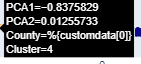

In [32]:
f

In [33]:
find_closest_counties(d, 'Ford', 17053)

,County,FIPS,Cluster,lat,lng,distance
622,Ford,17053,2,40.596865,-88.223134,0.000000
669,Piatt,17147,2,40.010247,-88.591111,72.308421
701,Benton,18007,2,40.606316,-87.310826,77.028551
697,Woodford,17203,2,40.788298,-89.210808,85.947985
780,Vermillion,18165,2,39.854093,-87.464142,104.754263
...,...,...,...,...,...,...
79,Juneau,2110,2,58.450919,-134.176440,3760.914560
78,Hoonah-Angoon,2105,2,58.285758,-135.638661,3841.417814
82,Kodiak,2150,2,57.666537,-153.775028,4905.643820
71,Bristol,2060,2,58.742202,-156.702670,5060.307131


In [34]:
disasterDict


{'National Risk Index': 'RISK',
 'Expected Annual Loss': 'EAL',
 'Expected Annual Loss Rate': 'ALR',
 'Social Vulnerability': 'SOVI',
 'Community Resilience': 'RESL',
 'Community Risk Factor': 'CRF',
 'Avalanche': 'ALVN',
 'Coastal Flooding': 'CFLD',
 'Cold Wave': 'CWAV',
 'Drought': 'DRGT',
 'Earthquake': 'ERQK',
 'Hail': 'HAIL',
 'Heat Wave': 'HWAV',
 'Hurricane': 'HRCN',
 'Ice Storm': 'ISTM',
 'Landslide': 'LNDS',
 'Lightning': 'LTNG',
 'Riverine Flooding': 'RFLD',
 'Strong Wind': 'SWND',
 'Tornado': 'TRND',
 'Tsunami': 'TSUN',
 'Volcanic Activity': 'VLCN',
 'Wildfire': 'WFIR',
 'Winter Weather': 'WNTW'}

In [35]:
fig, new_data = cluster_by_feature_prefix(data,disasterDict['Heat Wave'])

c:\Users\shiva\anaconda3\envs\mytfenv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [36]:
fig

In [37]:
find_closest_counties(new_data, 6049, 10)

,County,FIPS,Cluster,lat,lng,distance
211,Modoc,6049,4,41.589693,-120.725119,0.000000
1761,Storey,32029,4,39.446608,-119.528987,258.855482
2215,Crook,41013,4,44.142295,-120.356706,285.419108
192,Colusa,6011,4,39.177192,-122.236399,297.219820
1750,Douglas,32005,4,38.912134,-119.616209,312.242122
209,Mendocino,6045,4,39.440279,-123.391474,328.488339
243,Yolo,6113,4,38.686489,-121.901512,337.945860
2224,Jefferson,41031,4,44.629359,-121.176431,339.973470
2210,Benton,41003,4,44.491612,-123.428743,390.329589
2211,Clackamas,41005,4,45.188204,-122.220554,417.963194


In [38]:


def display_counties_on_map(closest_counties, target_county_fips):
    """
    Display the closest counties on a map using Folium.

    Parameters:
    - closest_counties (DataFrame): The DataFrame containing the closest counties.
    - target_county_fips (int): The FIPS code of the target county.

    Returns:
    - map (folium.Map): The Folium map object.
    """

    # Get the latitude and longitude of the target county
    target_county = closest_counties[closest_counties['FIPS'] == target_county_fips].iloc[0]
    target_lat = target_county['lat']
    target_lng = target_county['lng']

    # Create a map centered around the target county
    map = folium.Map(location=[target_lat, target_lng], zoom_start=10)

    # Add markers for the closest counties
    for index, row in closest_counties.iterrows():
        county_name = row['County']
        county_lat = row['lat']
        county_lng = row['lng']
        cluster = row['Cluster']

        # Set the color of the marker based on the cluster
        if cluster == target_county['Cluster']:
            color = 'green'
        else:
            color = 'red'

        # Add the marker to the map
        folium.Marker(
            location=[county_lat, county_lng],
            popup=county_name,
            icon=folium.Icon(color=color)
        ).add_to(map)

    # Display the map
    return map


In [39]:
fig, new_data = cluster_by_feature_prefix(data, 'RISK')


c:\Users\shiva\anaconda3\envs\mytfenv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [40]:
fig

In [41]:
display_counties_on_map(find_closest_counties(new_data, 6087, 10), 6087)

In [42]:
disasterDict

{'National Risk Index': 'RISK',
 'Expected Annual Loss': 'EAL',
 'Expected Annual Loss Rate': 'ALR',
 'Social Vulnerability': 'SOVI',
 'Community Resilience': 'RESL',
 'Community Risk Factor': 'CRF',
 'Avalanche': 'ALVN',
 'Coastal Flooding': 'CFLD',
 'Cold Wave': 'CWAV',
 'Drought': 'DRGT',
 'Earthquake': 'ERQK',
 'Hail': 'HAIL',
 'Heat Wave': 'HWAV',
 'Hurricane': 'HRCN',
 'Ice Storm': 'ISTM',
 'Landslide': 'LNDS',
 'Lightning': 'LTNG',
 'Riverine Flooding': 'RFLD',
 'Strong Wind': 'SWND',
 'Tornado': 'TRND',
 'Tsunami': 'TSUN',
 'Volcanic Activity': 'VLCN',
 'Wildfire': 'WFIR',
 'Winter Weather': 'WNTW'}

explore why avalanche, coastal flooding, drough, earthquake, wildfire are not working

In [43]:
fig, plot_df = cluster_by_feature_prefix(data,disasterDict['Winter Weather'])

c:\Users\shiva\anaconda3\envs\mytfenv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [44]:
data.head()

,GEO_ID,STATE_x,COUNTY_x,POPUNI,PRED0_E,PRED0_M,PRED0_PE,PRED0_PM,PRED12_E,PRED12_M,...,EP_ASIAN,MP_ASIAN,EP_AIAN,MP_AIAN,EP_NHPI,MP_NHPI,EP_TWOMORE,MP_TWOMORE,EP_OTHERRACE,MP_OTHERRACE
0,0500000US01001,1,1,58914,21939,5332.9,37.24,9.05,24867,5490.6,...,1.2,0.3,0.3,0.2,0.0,0.1,2.0,0.7,0.2,0.3
1,0500000US01003,1,3,237874,81276,19891.0,34.17,8.36,101767,20773.6,...,0.9,0.2,0.6,0.2,0.0,0.1,1.9,0.4,0.3,0.2
2,0500000US01005,1,5,22301,5294,1837.6,23.74,8.24,9536,2133.5,...,0.5,0.1,0.3,0.3,0.0,0.1,1.3,0.6,0.6,0.4
3,0500000US01007,1,7,20533,6532,1833.6,31.81,8.93,7912,1979.1,...,0.3,0.4,0.1,0.1,0.0,0.2,0.4,0.3,0.0,0.2
4,0500000US01009,1,9,58917,16899,4630.9,28.68,7.86,27353,4960.7,...,0.4,0.1,0.1,0.1,0.1,0.1,1.8,0.3,0.3,0.4


In [45]:
fig

In [46]:
find_closest_counties(plot_df, 5149, 12)

,County,FIPS,Cluster,lat,lng,distance
186,Yell,5149,0,35.002707,-93.411060,0.000000
169,Pope,5115,0,35.447695,-93.034001,60.177535
175,Scott,5127,0,34.861039,-94.063157,61.497739
147,Johnson,5071,0,35.570018,-93.460000,63.238244
135,Franklin,5047,0,35.512300,-93.890709,71.466723
174,Saline,5125,0,34.646618,-92.676553,77.864603
177,Sebastian,5131,0,35.199431,-94.273974,81.492227
134,Faulkner,5045,0,35.147325,-92.332019,99.502338
171,Pulaski,5119,0,34.769939,-92.311914,103.541656
182,Van,5141,0,35.580547,-92.516103,103.565942


In [47]:
display_counties_on_map(find_closest_counties(plot_df, 5149, 20),  5149)

In [48]:
convert_and_merge_csv()

NameError: name 'convert_and_merge_csv' is not defined

In [ ]:
closest_counties = find_closest_counties(winter_data, 38089, 10)
closest_counties


,County,FIPS,Cluster,lat,lng,distance
2035,Stark,38089,4,46.810789,-102.655044,0.000000
1996,Bowman,38011,4,46.112757,-103.520509,102.071803
2017,McKenzie,38053,4,47.740277,-103.395426,117.480842
1998,Burleigh,38015,4,46.977337,-100.468795,167.145595
1640,Richland,30083,4,47.787948,-104.561638,180.204365
1997,Burke,38013,4,48.790968,-102.518176,220.422938
1626,McCone,30055,4,47.645155,-105.795294,254.602632
1636,Powder,30075,4,45.394999,-105.630024,278.164654
2416,Potter,46107,4,45.064494,-99.957132,284.978794
2389,Haakon,46055,4,44.294637,-101.539748,292.942196


In [ ]:
display_counties_on_map(closest_counties, 38089)

In [ ]:


def convert_and_merge_csv(data, closest_counties, filepath):
    merged_data = pd.merge(data, closest_counties, on='FIPS', how='inner')
    merged_data_sorted = merged_data.sort_values(by='distance')
    merged_data_sorted.to_csv(filepath, index=False)


In [ ]:
find_closest_counties(winter_data, 17003, 10)

,County,FIPS,Cluster,lat,lng,distance
597,Alexander,17003,4,37.191625,-89.337591,0.000000
1550,Mississippi,29133,4,36.828055,-89.291170,40.636748
639,Johnson,17087,4,37.459599,-88.880746,50.196212
1066,McCracken,21145,4,37.053849,-88.712490,57.500205
1492,Bollinger,29017,4,37.321918,-90.025621,62.592626
1046,Hickman,21105,4,36.678064,-88.976051,65.525446
695,Williamson,17199,4,37.730407,-88.930096,69.876796
671,Pope,17151,4,37.413254,-88.561283,72.952467
1594,Wayne,29223,4,37.112622,-90.461445,99.988955
674,Randolph,17157,4,38.052150,-89.825655,104.897215


In [ ]:
fig, plot_df = cluster_custom_variables(data, ["PRED0_PE", "PRED0_PM",  "PRED12_E"])



c:\Users\shiva\anaconda3\envs\mytfenv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
plot_df

,County,FIPS,Cluster,lat,lng
0,Autauga,1001,0,32.535142,-86.642900
1,Baldwin,1003,0,30.727825,-87.722745
2,Barbour,1005,2,31.870090,-85.391068
3,Bibb,1007,2,32.998376,-87.126814
4,Blount,1009,2,33.980871,-86.567006
...,...,...,...,...,...
3138,Sweetwater,56037,0,41.659762,-108.879388
3139,Teton,56039,1,43.934564,-110.589698
3140,Uinta,56041,0,41.287497,-110.547405
3141,Washakie,56043,2,43.904378,-107.682315


In [ ]:
fig

In [ ]:
temp = find_closest_counties(plot_df, 31149, 10)

In [ ]:
display_counties_on_map(temp, 31149)

In [ ]:
convert_and_merge_csv(data, temp, 'test.csv')

In [ ]:
fig, plot_df = cluster_by_feature_prefix(data, disasterDict['National Risk Index'])

c:\Users\shiva\anaconda3\envs\mytfenv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
fig

In [ ]:
plot_df

,County,FIPS,Cluster,lat,lng
0,Autauga,1001,4,32.535142,-86.642900
1,Baldwin,1003,3,30.727825,-87.722745
2,Barbour,1005,4,31.870090,-85.391068
3,Bibb,1007,0,32.998376,-87.126814
4,Blount,1009,1,33.980871,-86.567006
...,...,...,...,...,...
2959,Clark,53011,0,45.779198,-122.482311
2960,Columbia,53013,4,46.297961,-117.907825
2961,Cowlitz,53015,4,46.193215,-122.680273
2962,Douglas,53017,0,47.735896,-119.691707


In [ ]:
testDist = find_closest_counties(plot_df, 45031, 10)

In [ ]:
display_counties_on_map(testDist, 45031)

In [ ]:
convert_and_merge_csv(data, testDist, 'testDist.csv')

In [ ]:
convert_and_merge_csv(data, plot_df,  'testing.csv')